In [106]:
from psychophysicsUtils import * 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
names = [
         'molly',
         'simon',
         'niko',
         'rodrigo',
         'ricky',
         'sian',
         'clem',
         'tadej',
         #'tomtest',
         #'nici',
         #'nicole',
         #'lillianne',
         #'dammy',
         #'shanice',
         #'morio',
         #'chris',
        ]



In [26]:
#data = {}
for name in names:
    data[name] = {}
    print('\n \n \n'+name,)
    data[name] = pupilDataClass(name)
    data[name].loadData(defaultMachine='EL',eye='right')
    data[name].uniformSample()
    data[name].removeOutliers(n_speed=3,n_size=3)
    data[name].downSample()
    data[name].interpolate(gapExtension=0.1)
    data[name].frequencyFilter(lowF=0.1, lowFwidth=0.01, highF=4, highFwidth=0.5)
    data[name].zScore()
    

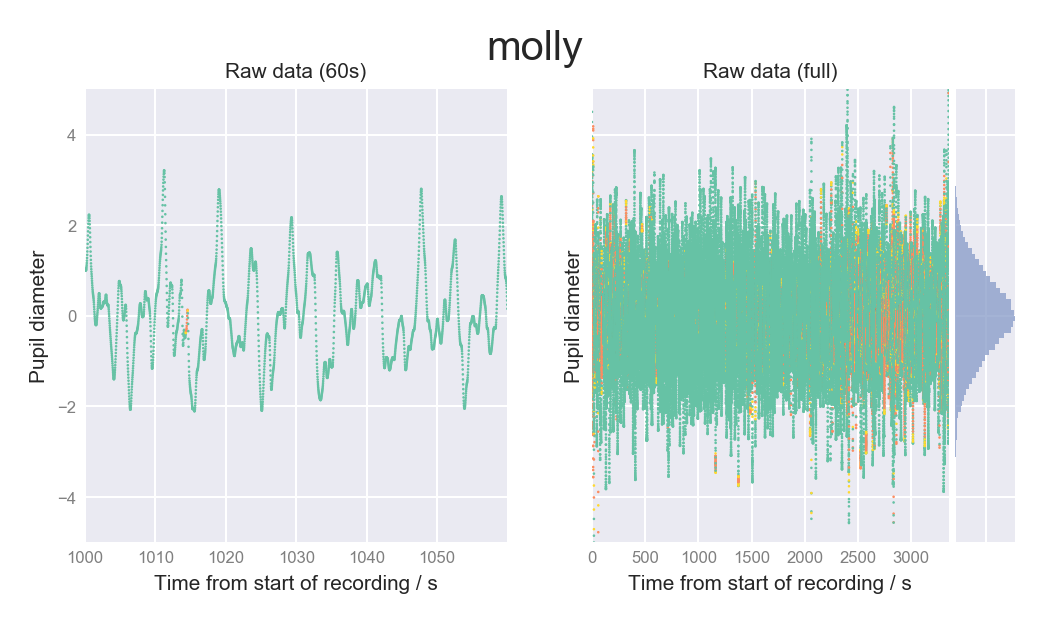

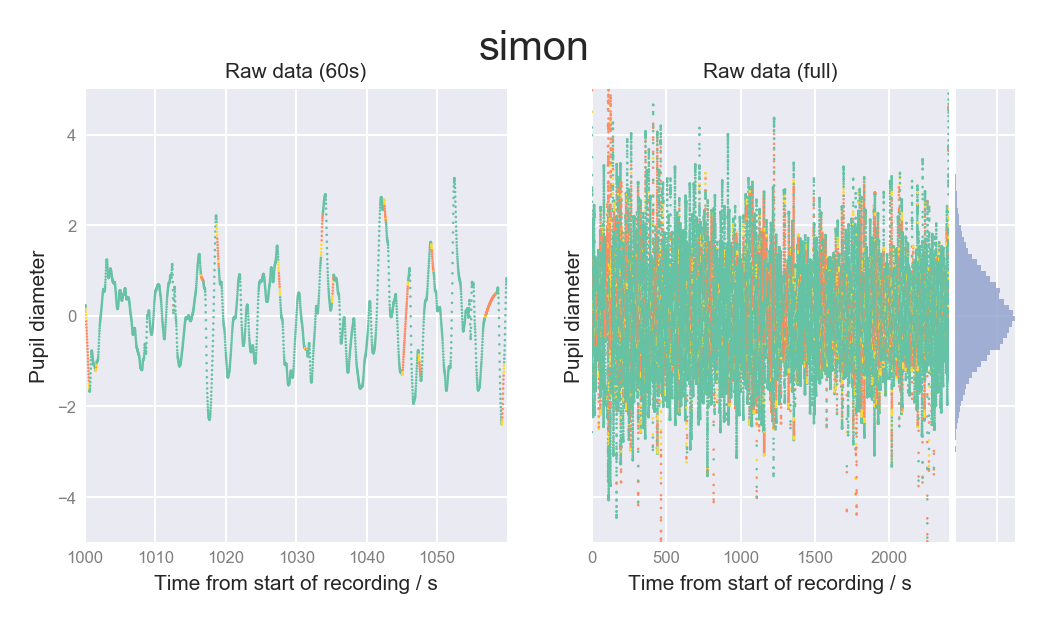

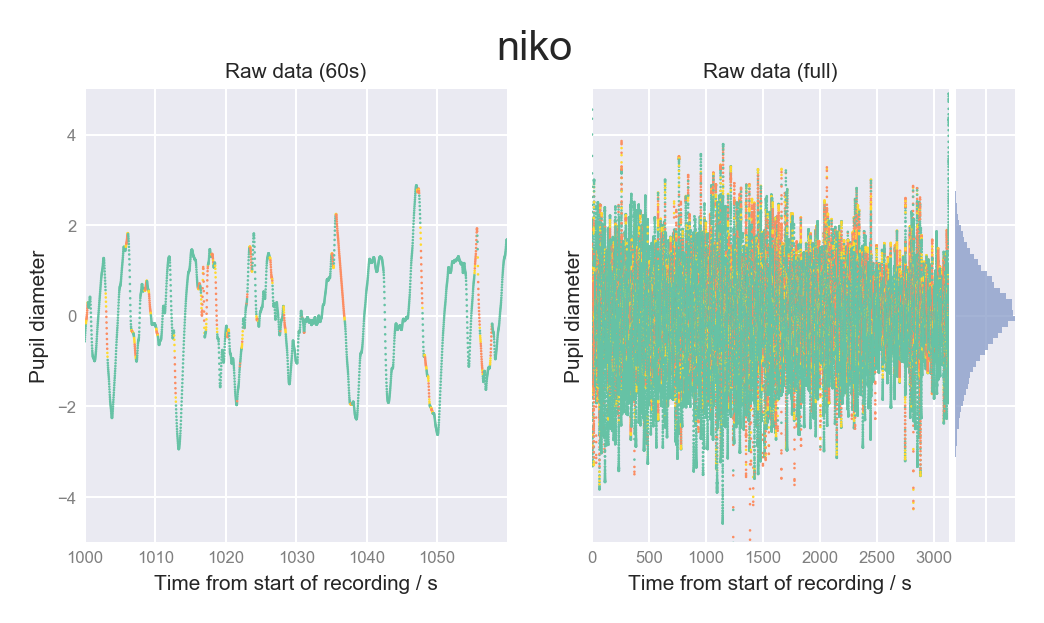

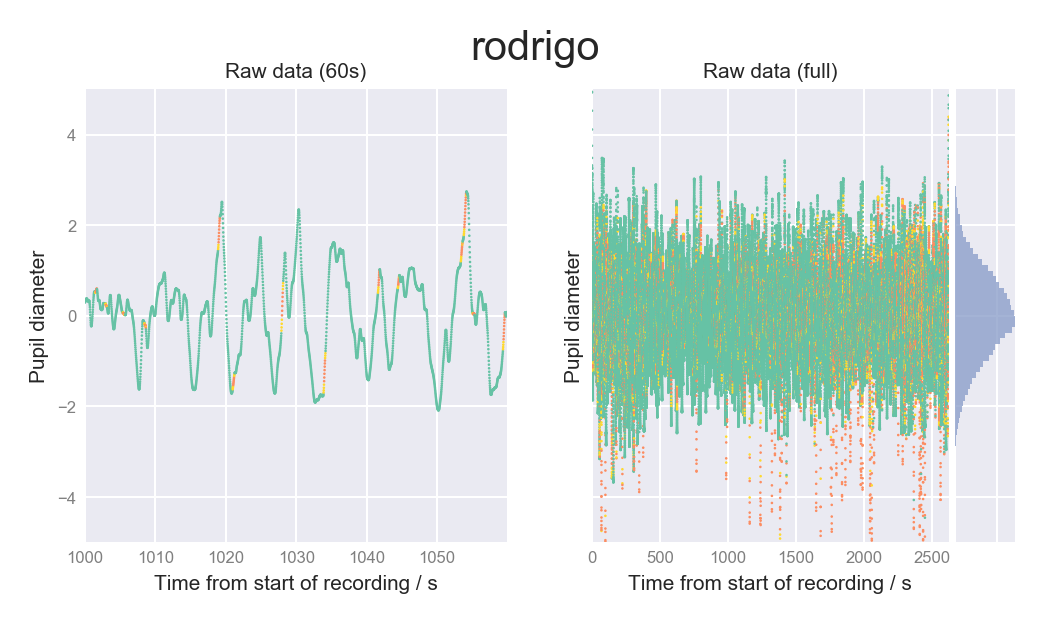

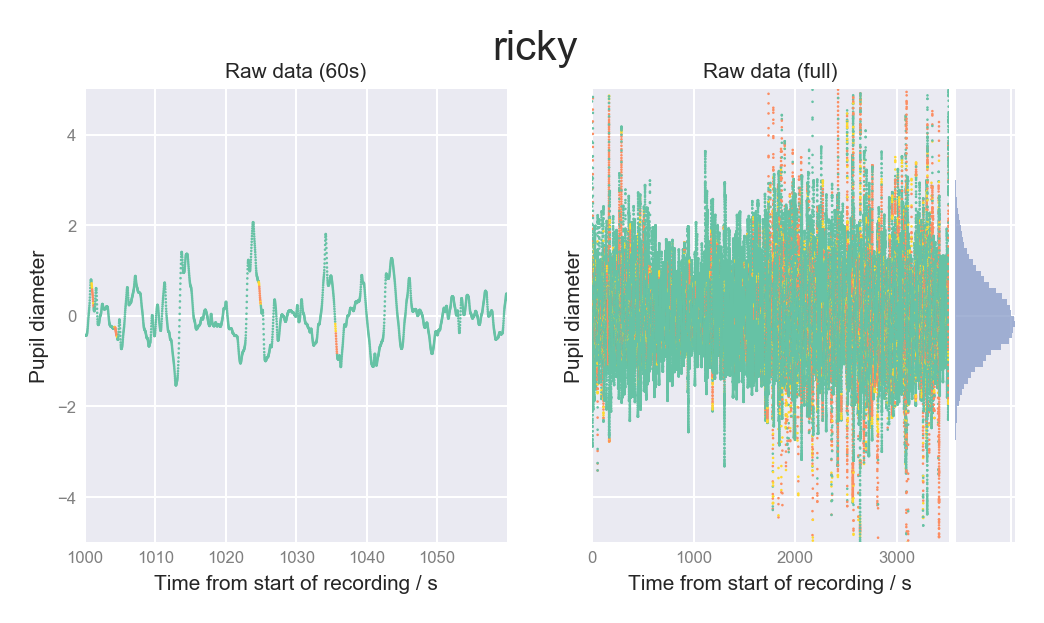

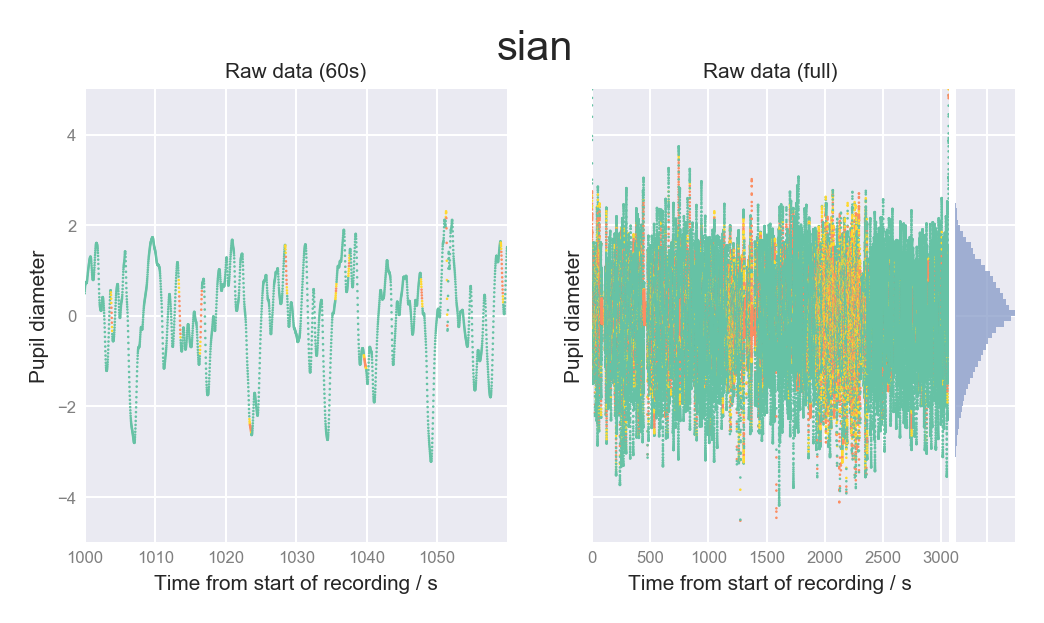

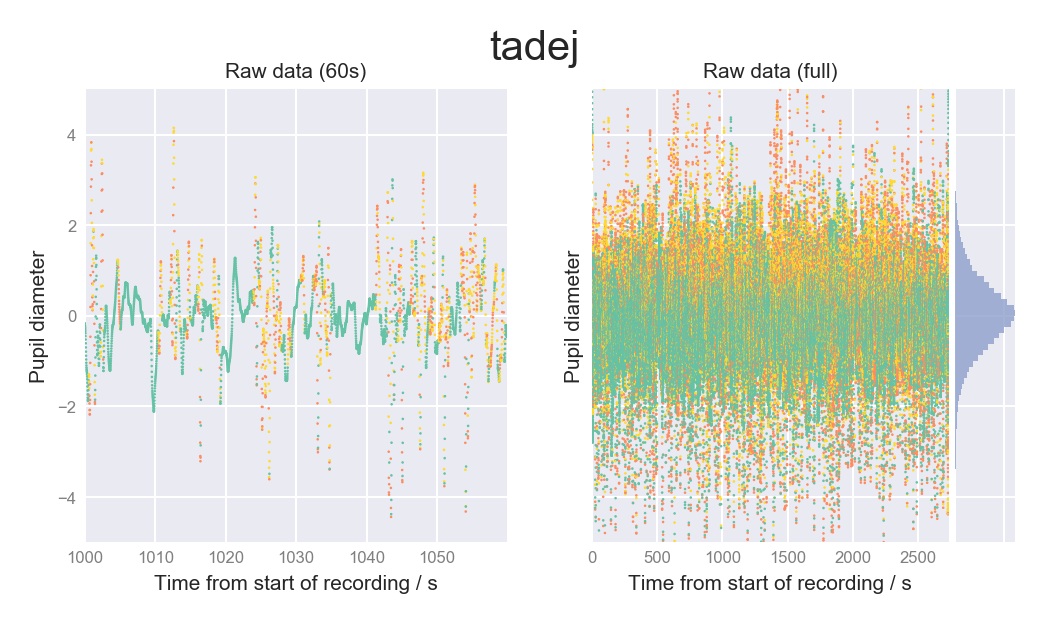

In [128]:
for name in names:
    data[name].plot(title=name, zoomRange = [1000,1060], saveName = None, hist=True, ymin='-ymax', ymax=5)

In [29]:
for name in names:
    data[name].loadAndProcessTrialData()

molly: 321 trials
Loading and cleaning trial data


  0%|          | 0/321 [00:00<?, ?it/s]

simon: 222 trials
Loading and cleaning trial data


  0%|          | 0/222 [00:00<?, ?it/s]

niko: 289 trials
Loading and cleaning trial data


  0%|          | 0/289 [00:00<?, ?it/s]

rodrigo: 252 trials
Loading and cleaning trial data


  0%|          | 0/252 [00:00<?, ?it/s]

ricky: 336 trials
Loading and cleaning trial data


  0%|          | 0/336 [00:00<?, ?it/s]

sian: 262 trials
Loading and cleaning trial data


  0%|          | 0/262 [00:00<?, ?it/s]

clem: 192 trials
Loading and cleaning trial data


  0%|          | 0/192 [00:00<?, ?it/s]

tadej: 258 trials
Loading and cleaning trial data


  0%|          | 0/258 [00:00<?, ?it/s]

In [30]:
print('Example:')
exampleTrial = 21
print('White cross appears: %.3f' %data[names[0]].trialData[exampleTrial]['whiteCrossAppears'])
print('White noise starts:  %.3f' %data[names[0]].trialData[exampleTrial]['whiteNoiseStart'])
print('Tone starts:         %.3f' %data[names[0]].trialData[exampleTrial]['toneStart'])
print('Gap starts:          %.3f' %data[names[0]].trialData[exampleTrial]['gapStart'])
print('Tone after gap?:     %r' %data[names[0]].trialData[exampleTrial]['toneAfterGap'])
print('Tone heard?:         %r' %data[names[0]].trialData[exampleTrial]['toneHeard'])

Example:
White cross appears: 225.308
White noise starts:  230.787
Tone starts:         232.309
Gap starts:          233.787
Tone after gap?:     False
Tone heard?:         True


In [111]:
plotNames = [
         'molly',
         'simon',
         'niko',
         'rodrigo',
         'ricky',
         'sian',
         'clem',
         'tadej',
         #'tomtest',
         #'nici',
         #'nicole',
         #'lillianne',
         #'marta',
         #'dammy',
         #'shanice',
         #'morio',
         #'chris',
        ]
name = 'all'
whoToPlot = plotNames
plotData = {}
for person in whoToPlot:
    plotData[person] = data[person]



In [112]:
today = datetime.strftime(datetime.now(),'%y%m%d') 
now = datetime.strftime(datetime.now(),'%H%M')

## Reaction time change over time 

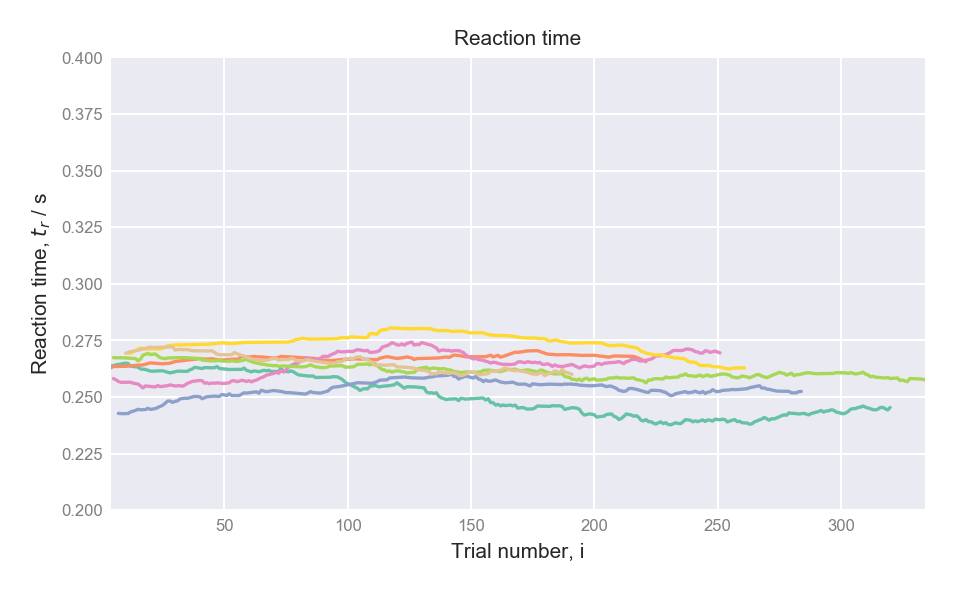

In [113]:
fig, ax = plt.subplots(figsize=(3.5,2))

max_ = 0
for (i,name_) in enumerate(plotNames):
    trialIndex = []
    reactionTime = []
    for j in range(len(data[name_].trialData)):
        if (j > 3
            and data[name_].trialData[j]['trialCorrect'] == 'correct' 
           ):
            trialIndex.append(j)
            reactionTime.append(data[name_].trialData[j]['reactionTime'])

    smoothedReactionTime = []
    smoothedReactionTimeStd = []
    for j in range(len(reactionTime)):
        a = reactionTime[max(0,j-30):min(len(reactionTime),j+30)]
        smoothedReactionTime.append(np.mean(a))
        smoothedReactionTimeCi95 = 1.96*np.std(a)/np.sqrt(len(a))
    slope = stats.linregress(trialIndex,smoothedReactionTime)[0]
    ax.plot(trialIndex,smoothedReactionTime,alpha=1,c='C'+str(i),linewidth=0.8,label=r"%s: $dt_{r}/di$ = %.6f" %(name_,slope))
    #ax.plot(trialIndex,reactionTime,alpha=0.4,c='C'+str(i),linewidth=0.15)
    #ax.fill_between(trialIndex,smoothedReactionTime+smoothedReactionTimeCi95,smoothedReactionTime-smoothedReactionTimeCi95,alpha=0.2,color='C'+str(i))
    max_ = max(max_,np.max(reactionTime))
ax.set_ylim([0.2,0.4])
ax.set_xlabel('Trial number, i')
ax.set_ylabel(r'Reaction time, $t_{r}$ / s') 
ax.set_title('Reaction time')
#ax.legend()
saveFigure(fig, f'{name}_reactiontime')

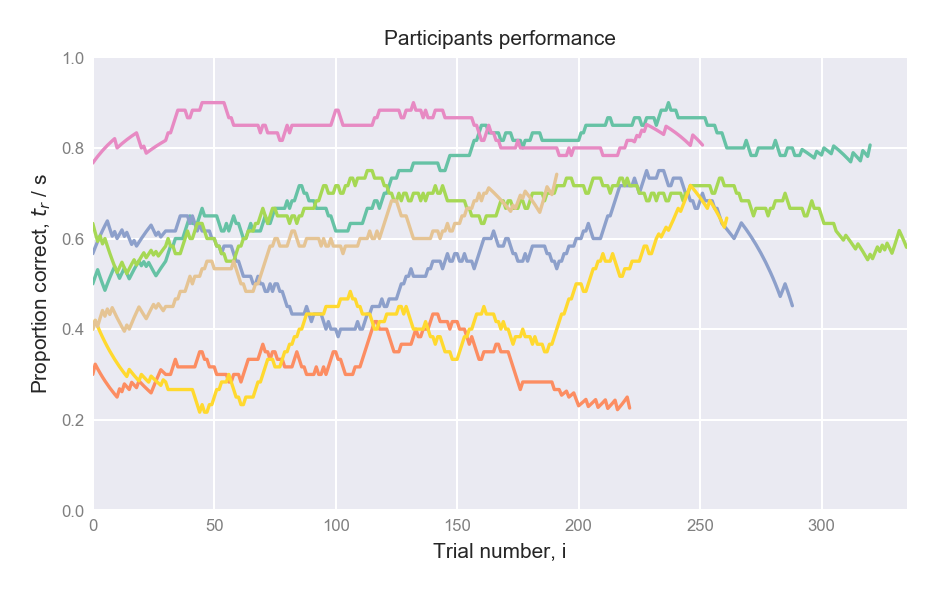

In [114]:
fig, ax = plt.subplots(figsize=(3.5,2))

max_ = 0
for (i,name_) in enumerate(plotNames):
    trialIndex = []
    errorRate = []
    for j in range(len(data[name_].trialData)):
        trialIndex.append(j)
        errorRate.append(int(data[name_].trialData[j]['trialCorrect'] == 'correct'))

    smoothedErrorRate = []
    smoothedErrorRate = []
    for j in range(len(errorRate)):
        a = errorRate[max(0,j-30):min(len(errorRate),j+30)]
        smoothedErrorRate.append(np.mean(a))
        smoothedErrorRateCi95 = 1.96*np.std(a)/np.sqrt(len(a))
    slope = stats.linregress(trialIndex,smoothedErrorRate)[0]
    ax.plot(trialIndex,smoothedErrorRate,alpha=1,c='C'+str(i),linewidth=0.8,label=r"%s: $dt_{r}/di$ = %.6f" %(name_,slope))
    #ax.plot(trialIndex,errorRate,alpha=0.4,c='C'+str(i),linewidth=0.15)
    #ax.fill_between(trialIndex,smoothedErrorRate+smoothedErrorRateCi95,smoothedErrorRate-smoothedErrorRateCi95,alpha=0.2,color='C'+str(i))
    max_ = max(max_,np.max(errorRate))
ax.set_ylim([0,1])
ax.set_xlabel('Trial number, i')
ax.set_ylabel(r'Proportion correct, $t_{r}$ / s') 
ax.set_title('Participants performance')
#ax.legend()
saveFigure(fig, f'{name}_performance')

## Pupil responses aligned to trial events


molly: 20 valid trials of which 20 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
simon: 20 valid trials of which 20 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
niko: 20 valid trials of which 20 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
rodrigo: 20 valid trials of which 20 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
ricky: 20 valid trials of which 20 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
sian: 20 valid trials of which 20 remain after: 
      0 excluded due to inter

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff407bafcc0>)

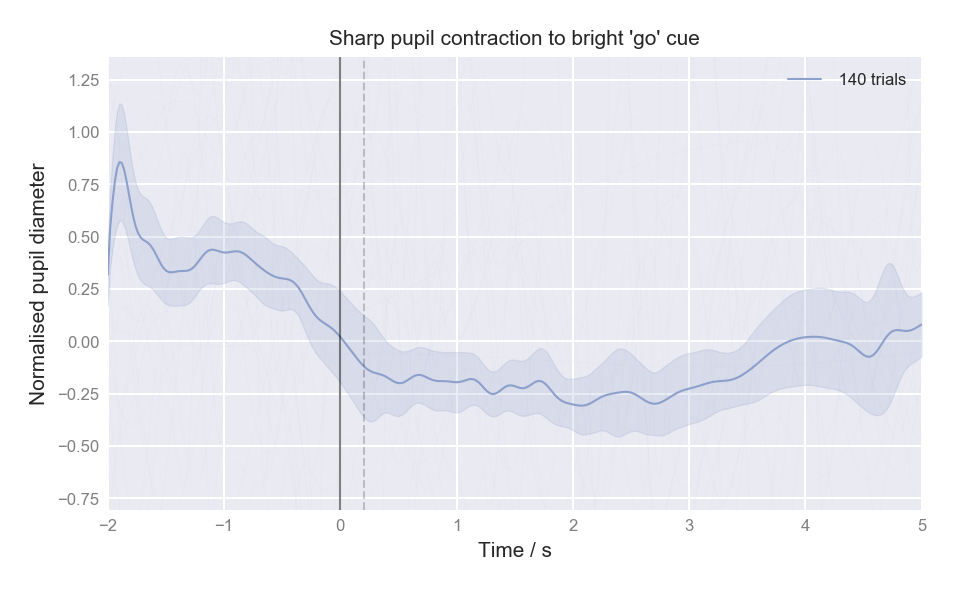

In [115]:
plotAlignedPupilDiams(plotData,
                      alignEvent='whiteCrossAppears',
                      title="Sharp pupil contraction to bright 'go' cue",
                      dd={'':{'color':'C2','conditions':[0,13],'range':('all'),'plotTrials':True}},
                      saveTitle = f"{name}_gocue")


molly: 271 valid trials of which 271 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
simon: 172 valid trials of which 172 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
niko: 239 valid trials of which 239 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
rodrigo: 202 valid trials of which 202 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
ricky: 286 valid trials of which 286 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
sian: 212 valid trials of which 212 remain after: 
      0 excluded 

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff409ff2898>)

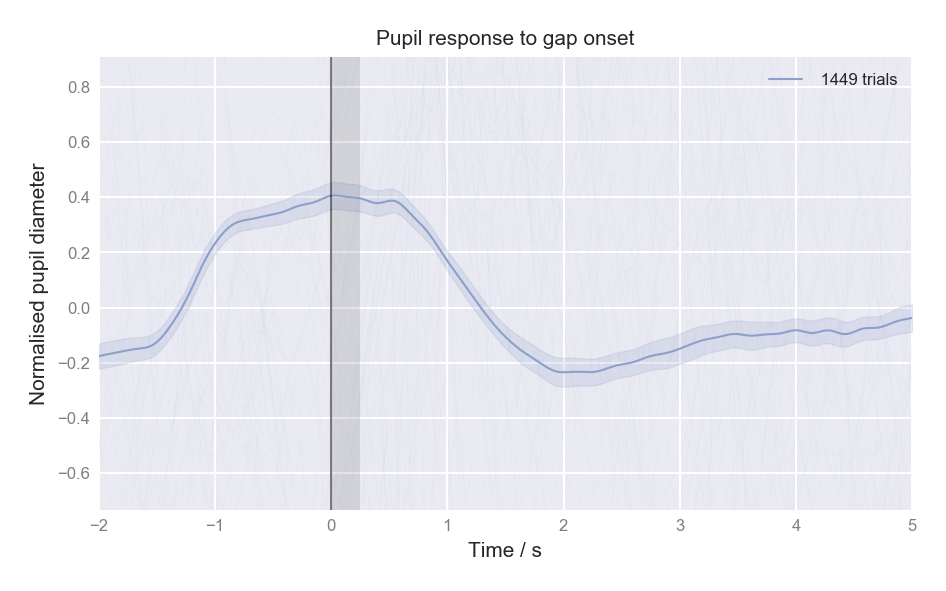

In [116]:
plotAlignedPupilDiams(plotData,
                      alignEvent='gapStart',
                      title="Pupil response to gap onset",
                      saveTitle = f"{name}_gap",
                      dd={'':{'color':'C2','conditions':[2,13],'range':('all'),'plotTrials':True}})


molly: 271 valid trials of which 271 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
simon: 172 valid trials of which 172 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
niko: 239 valid trials of which 239 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
rodrigo: 202 valid trials of which 202 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
ricky: 286 valid trials of which 286 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
sian: 212 valid trials of which 212 remain after: 
      0 excluded 

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff407bb7a20>)

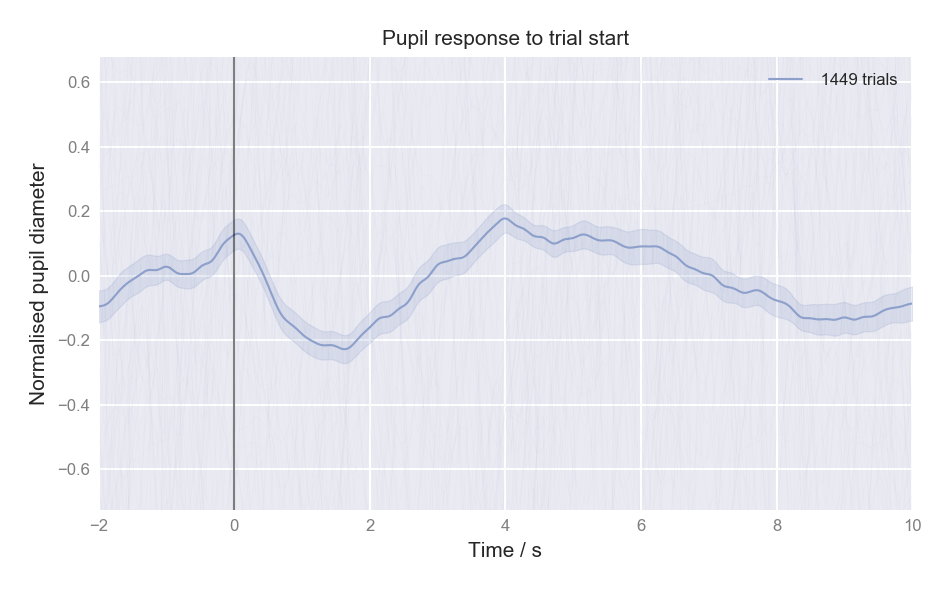

In [117]:
plotAlignedPupilDiams(plotData,
                      alignEvent='trialStart',
                      title="Pupil response to trial start",
                      saveTitle = f"{name}_trialstart",
                      tend=10,
                      dd={
                          '':{'color':'C2','conditions':[2,13],'range':('all'),'plotTrials':True},
                      })

Normal
molly: 182 valid trials of which 179 remain after: 
      0 excluded due to interpolation 
      3 excluded due to high variance 
      0 excluded due to no pupildata in this time range
Violation
molly: 47 valid trials of which 47 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
SIGNIFICANCE TESTING BETWEEN 0.62 AND 3.62s:
Normal vs Violation: 0.0000
(-3.27195837812204, 3.061690379586928)
Normal
simon: 111 valid trials of which 108 remain after: 
      0 excluded due to interpolation 
      3 excluded due to high variance 
      0 excluded due to no pupildata in this time range
Violation
simon: 33 valid trials of which 33 remain after: 
      0 excluded due to interpolation 
      0 excluded due to high variance 
      0 excluded due to no pupildata in this time range
SIGNIFICANCE TESTING BETWEEN 0.62 AND 3.62s:
Normal vs Violation: 0.0000
(-3.322887280939619, 3.0822098035027143)


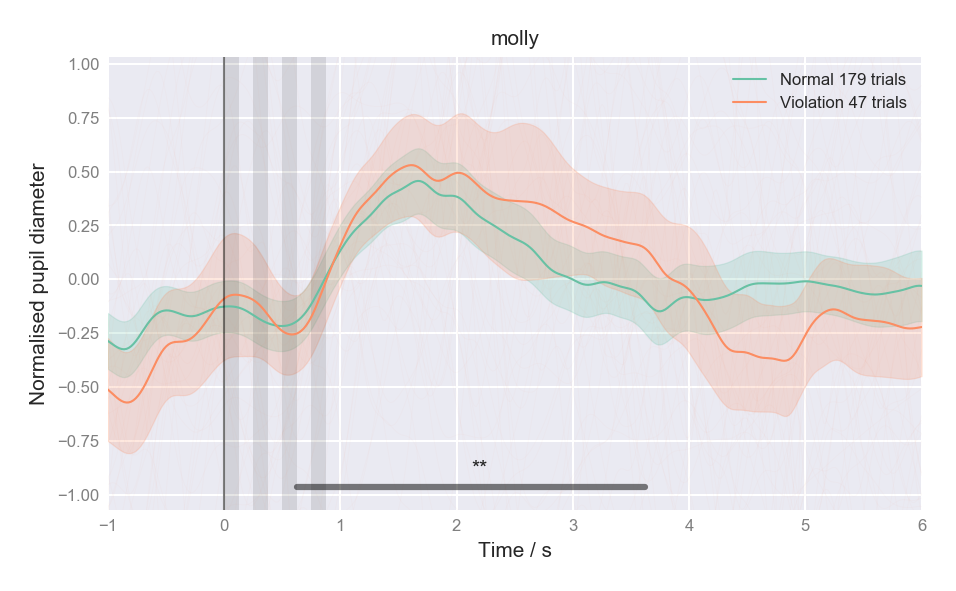

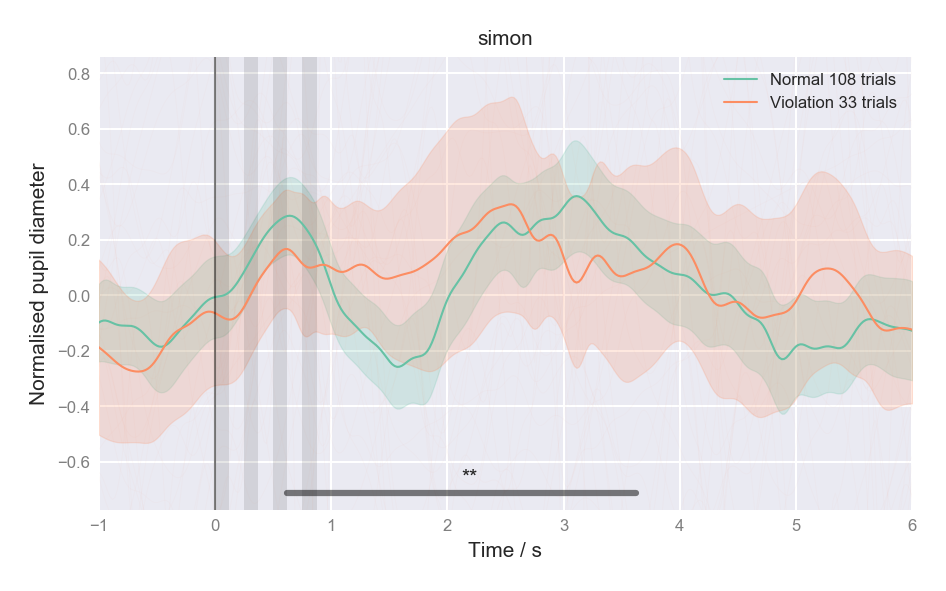

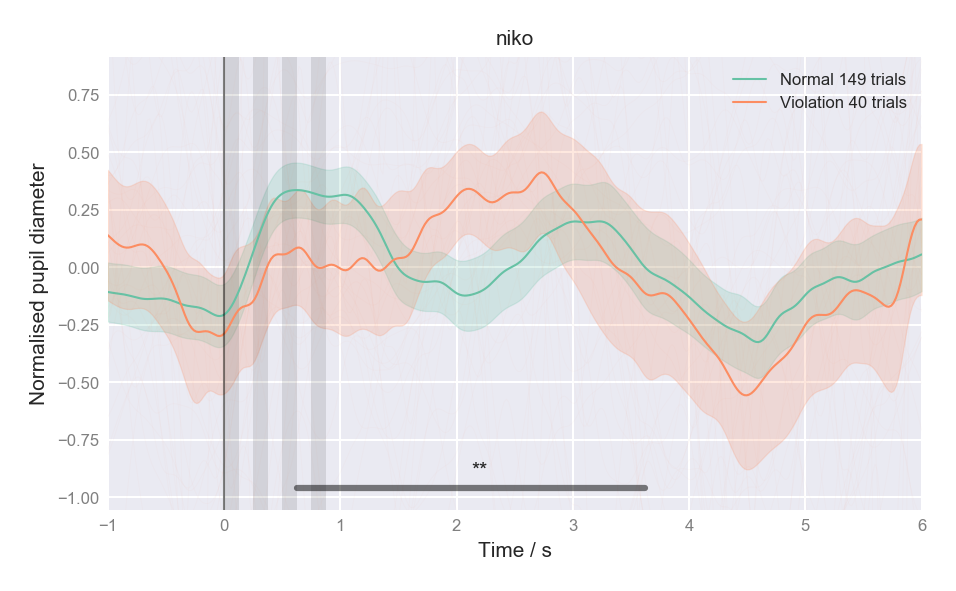

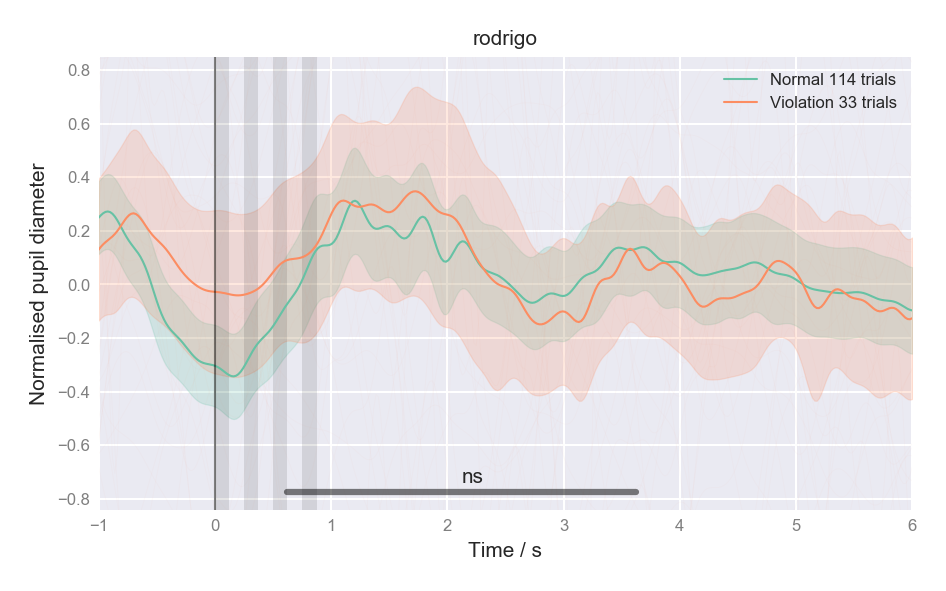

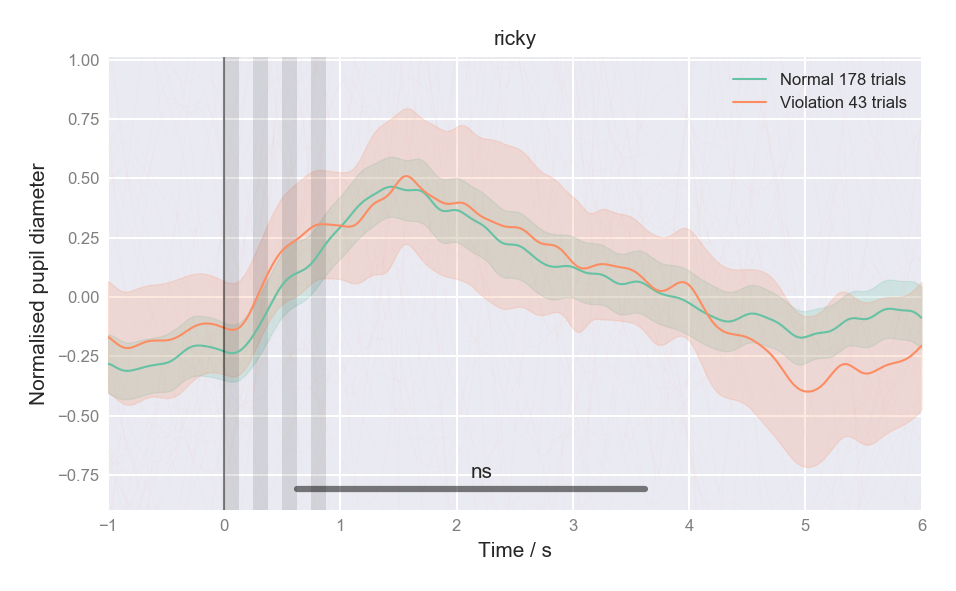

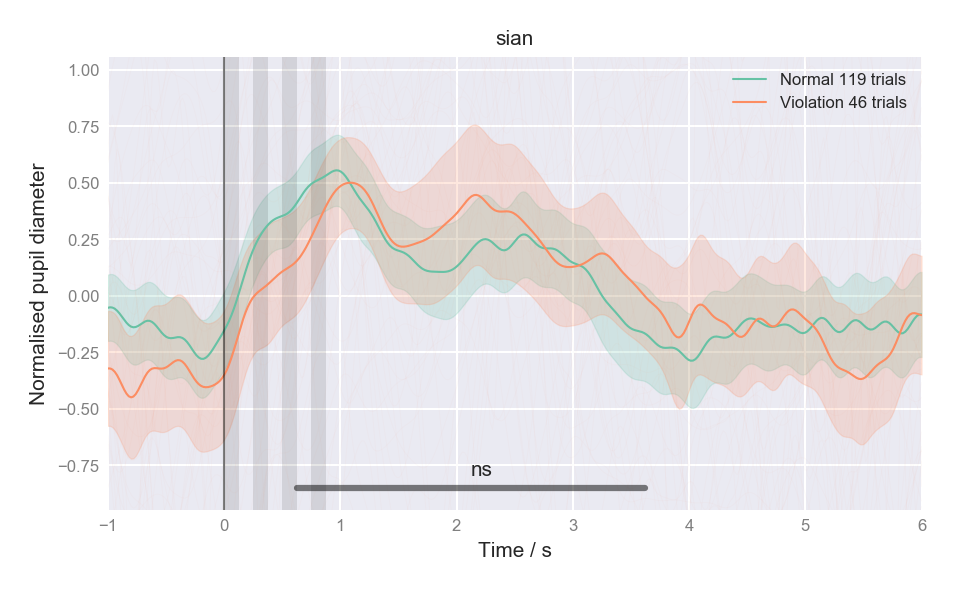

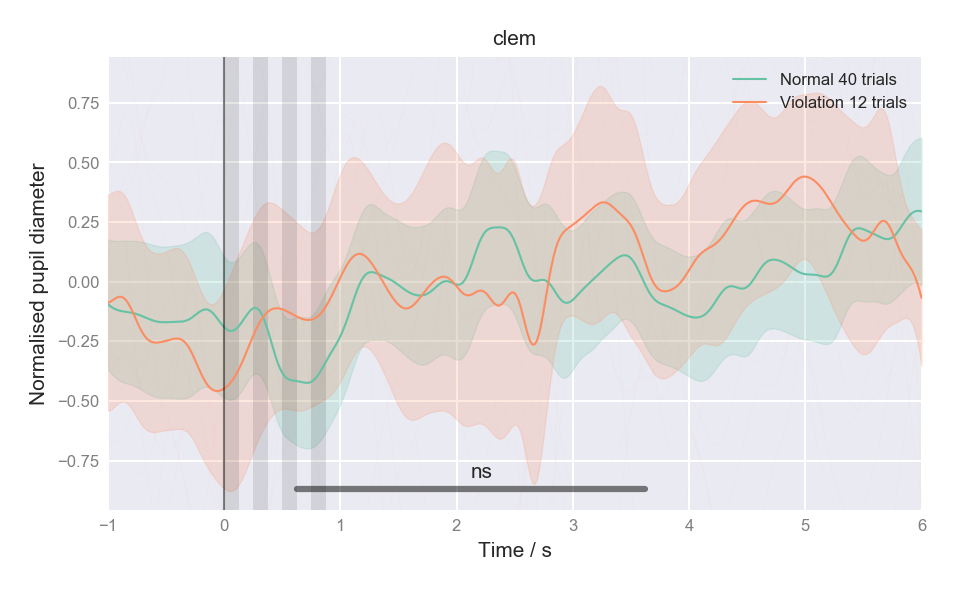

In [118]:
for name_ in plotNames:
    plotData_ = {}
    plotData_[name_] = data[name_]
    plotAlignedPupilDiams(plotData_, 
                          alignEvent='toneStart',
                          title=name_,
                          saveTitle = f"{name_}_tone",
                          dd={
                              'Normal':        {'color':'C0','conditions':[2,4,10,11,13],'range':('all'),'plotTrials':False},
                              'Violation':     {'color':'C1','conditions':[2,5,10,11,13],'range':('all'),'plotTrials':True},
                             },
                          testRange=[0.625,3.625],
                          tstart=-1,
                          tend=6
                         )

Normal
molly: 182 valid trials of which 177 remain after: 
      0 excluded due to interpolation 
      5 excluded due to high variance 
      0 excluded due to no pupildata in this time range
simon: 111 valid trials of which 101 remain after: 
      0 excluded due to interpolation 
      10 excluded due to high variance 
      0 excluded due to no pupildata in this time range
niko: 151 valid trials of which 147 remain after: 
      0 excluded due to interpolation 
      4 excluded due to high variance 
      0 excluded due to no pupildata in this time range
rodrigo: 118 valid trials of which 103 remain after: 
      0 excluded due to interpolation 
      15 excluded due to high variance 
      0 excluded due to no pupildata in this time range
ricky: 190 valid trials of which 162 remain after: 
      0 excluded due to interpolation 
      28 excluded due to high variance 
      0 excluded due to no pupildata in this time range
sian: 119 valid trials of which 118 remain after: 
      0 

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff40aa5a898>)

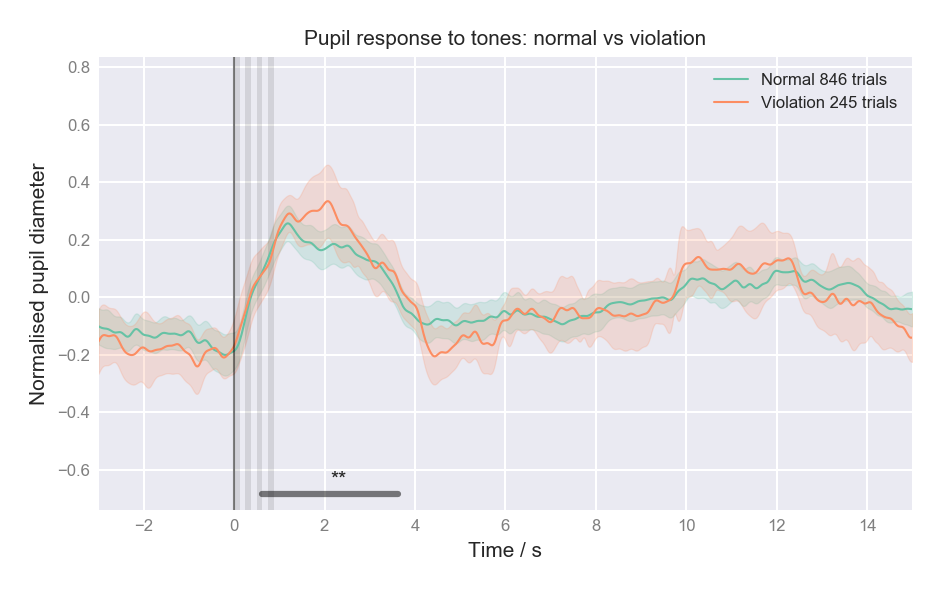

In [122]:
plotAlignedPupilDiams(plotData, 
                      alignEvent='toneStart',
                      title="Pupil response to tones: normal vs violation",
                      saveTitle = f"{name}_tone",
                      dd={
                          'Normal':     {'color':'C0','conditions':[2,4,10,11],'range':('all'),'plotTrials':False},
                          'Violation':  {'color':'C1','conditions':[2,5,10,11],'range':('all'),'plotTrials':False},

                         },
                      testRange=[0.625,3.625],
                      tstart=-3,
                      tend=15
                     )


Normal
molly: 182 valid trials of which 179 remain after: 
      0 excluded due to interpolation 
      3 excluded due to high variance 
      0 excluded due to no pupildata in this time range
simon: 111 valid trials of which 108 remain after: 
      0 excluded due to interpolation 
      3 excluded due to high variance 
      0 excluded due to no pupildata in this time range
niko: 151 valid trials of which 149 remain after: 
      0 excluded due to interpolation 
      2 excluded due to high variance 
      0 excluded due to no pupildata in this time range
rodrigo: 118 valid trials of which 114 remain after: 
      0 excluded due to interpolation 
      4 excluded due to high variance 
      0 excluded due to no pupildata in this time range
ricky: 190 valid trials of which 178 remain after: 
      0 excluded due to interpolation 
      12 excluded due to high variance 
      0 excluded due to no pupildata in this time range
sian: 119 valid trials of which 119 remain after: 
      0 ex

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff40d9de4e0>)

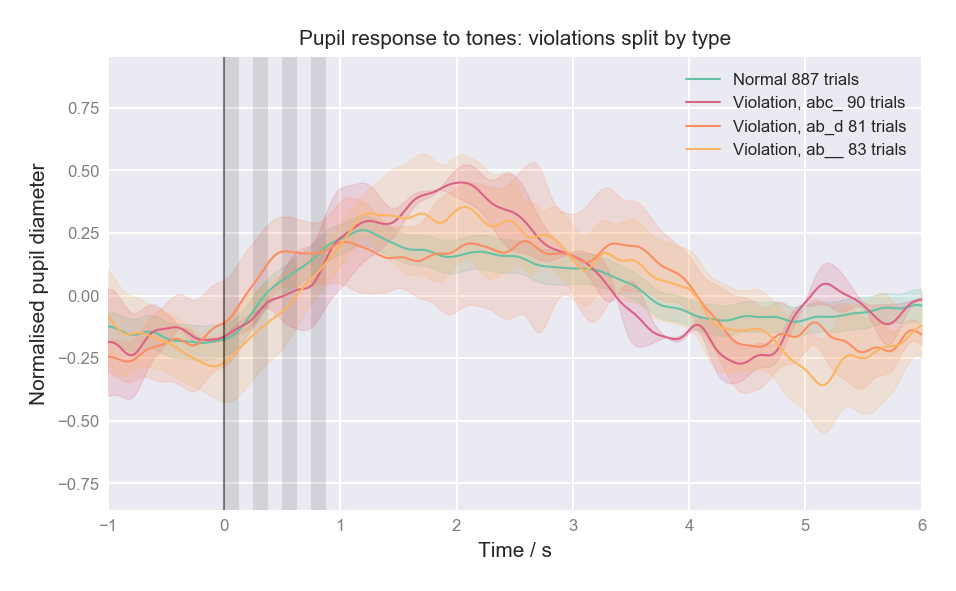

In [120]:
plotAlignedPupilDiams(plotData, 
                      alignEvent='toneStart',
                      title="Pupil response to tones: violations split by type",
                      saveTitle = name+"_tonesplit",
                      dd={
                          'Normal':        {'color':'C0','conditions':[2,4,10,11,13],'range':('all'),'plotTrials':False},
                          #'Violation':     {'color':'C1','conditions':[2,5,10,11,13],'range':('all'),'plotTrials':False},
                          'Violation, abc_':     {'color':'#dc6284','conditions':[2,6,10,11,13],'range':('all'),'plotTrials':False},
                          'Violation, ab_d':     {'color':'C1','conditions':[2,7,10,11,13],'range':('all'),'plotTrials':False},
                          'Violation, ab__':     {'color':'#fcb462','conditions':[2,8,10,11,13],'range':('all'),'plotTrials':False},
                         },
                      testRange=[0.625,3.625],
                      tstart=-1,
                      tend=6
                     )

Normal first
molly: 221 valid trials of which 217 remain after: 
      0 excluded due to interpolation 
      4 excluded due to high variance 
      0 excluded due to no pupildata in this time range
simon: 147 valid trials of which 140 remain after: 
      0 excluded due to interpolation 
      7 excluded due to high variance 
      0 excluded due to no pupildata in this time range
niko: 188 valid trials of which 185 remain after: 
      0 excluded due to interpolation 
      3 excluded due to high variance 
      0 excluded due to no pupildata in this time range
rodrigo: 163 valid trials of which 158 remain after: 
      0 excluded due to interpolation 
      5 excluded due to high variance 
      0 excluded due to no pupildata in this time range
ricky: 235 valid trials of which 222 remain after: 
      0 excluded due to interpolation 
      13 excluded due to high variance 
      0 excluded due to no pupildata in this time range
sian: 154 valid trials of which 154 remain after: 
    

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff406d3a4e0>)

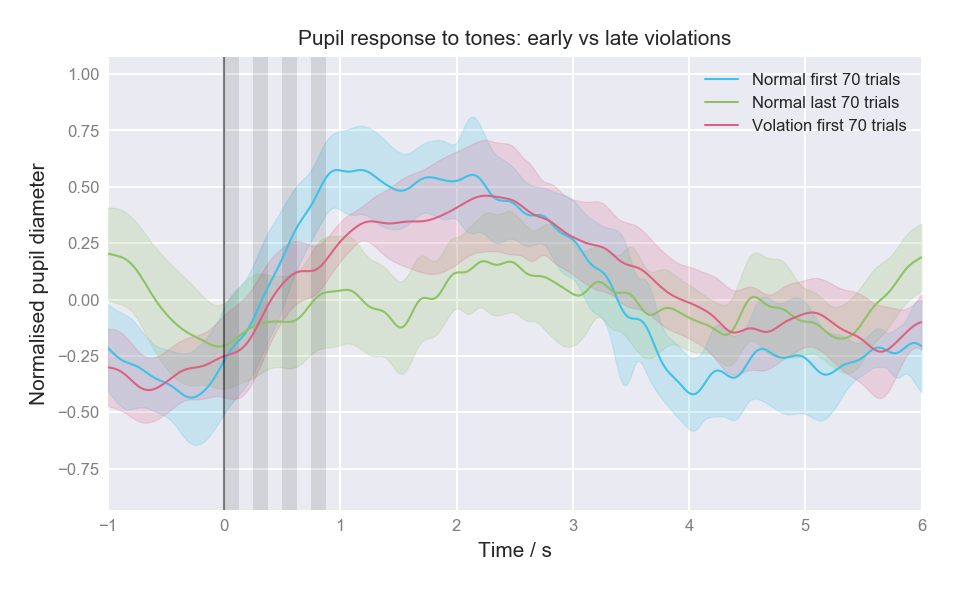

In [124]:
plotAlignedPupilDiams(plotData,
                      alignEvent='toneStart',
                      title="Pupil response to tones: early vs late violations",
                      saveTitle=name+"earlylate",
                      tstart=-1,tend=6,
                      dd={
                          'Normal first':        {'color':'#3ec2e6','conditions':[1,4,10,11,13],'range':('first',10),'plotTrials':False},
                          #'Normal middle':       {'color':'C0','conditions':[0,3,5],'range':('mid',60),'plotTrials':False},
                          'Normal last':         {'color':'#8ec264','conditions':[1,4,10,11,13],'range':('last',10),'plotTrials':False},
                          'Volation first':      {'color':'#dc6284','conditions':[1,5,10,11,13],'range':('first',10),'plotTrials':False},
                          #'Violation middle':    {'color':'C1','conditions':[2,5,10,11,13],'range':('mid',10),'plotTrials':False},
                          #'Violation last':      {'color':'#fcb462','conditions':[1,5,10,11,13],'range':('last',10),'plotTrials':False},
                         },
                      testRange=[0.625,3.625]
                     )

Normal
molly: 182 valid trials of which 179 remain after: 
      0 excluded due to interpolation 
      3 excluded due to high variance 
      0 excluded due to no pupildata in this time range
simon: 111 valid trials of which 108 remain after: 
      0 excluded due to interpolation 
      3 excluded due to high variance 
      0 excluded due to no pupildata in this time range
niko: 151 valid trials of which 149 remain after: 
      0 excluded due to interpolation 
      2 excluded due to high variance 
      0 excluded due to no pupildata in this time range
rodrigo: 118 valid trials of which 114 remain after: 
      0 excluded due to interpolation 
      4 excluded due to high variance 
      0 excluded due to no pupildata in this time range
ricky: 190 valid trials of which 178 remain after: 
      0 excluded due to interpolation 
      12 excluded due to high variance 
      0 excluded due to no pupildata in this time range
sian: 119 valid trials of which 119 remain after: 
      0 ex

(<Figure size 1050x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff40f0d9fd0>)

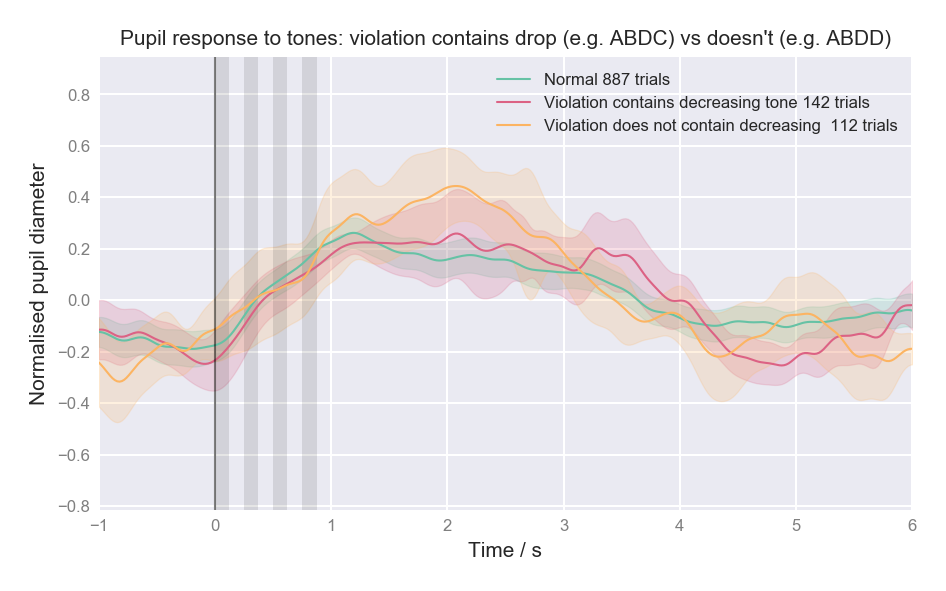

In [125]:
plotAlignedPupilDiams(plotData, 
                      alignEvent='toneStart',
                      title="Pupil response to tones: violation contains drop (e.g. ABDC) vs doesn't (e.g. ABDD)",
                      saveTitle = name+"_tonedecreasing",
                      dd={
                          'Normal':     {'color':'C0','conditions':[2,4,10,11,13],'range':('all'),'plotTrials':False},
                          'Violation contains decreasing tone':  {'color':'#dc6284','conditions':[2,5,10,11,13,9],'range':('all'),'plotTrials':False},
                          'Violation does not contain decreasing ':  {'color':'#fcb462','conditions':[2,5,10,11,13,14],'range':('all'),'plotTrials':False}
                         },
                      testRange=[1.75,5],
                      tstart=-1,
                      tend=6
                     )


In [ ]:
t = np.linspace(0,1,50)
y0 = np.sin(2*np.pi*t)
y1 = np.sin(2*np.pi*t) + 0.5*np.exp(-(t-0.8)**2/(2*0.1**2))
y2 = np.sin(2*np.pi*t) + np.exp(-(t-0.8)**2/(2*0.1**2))
std = 0.125*np.ones(len(t))

p0 = funcZeroTest(y0-y0,np.sqrt(2)*std,ntests=1000)
p1 = funcZeroTest(y0-y1,np.sqrt(2)*std,ntests=1000)
p2 = funcZeroTest(y0-y2,np.sqrt(2)*std,ntests=1000)

fig, ax = plt.subplots(figsize = (1.5,1))
ax.plot(t,y0,label='p = %.5f'%p0)
ax.plot(t,y1,label='p = %.5f'%p1)
ax.plot(t,y2,label='p = %.5f'%p2)
ax.fill_between(t,y0+1.96*std,y0-1.96*std,color='C0',alpha=0.2)
ax.fill_between(t,y1+1.96*std,y1-1.96*std,color='C1',alpha=0.2)
ax.fill_between(t,y2+1.96*std,y2-1.96*std,color='C2',alpha=0.2)
ax.set_title('A test for my test')
ax.legend()

plt.savefig("./figures/testtest.png",dpi=400)